## Project Brief

In this project, I will be playing a role of data analyst and try to answer below questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [300]:
#import necessary libraries
import pandas as pd
import numpy as np

In [301]:
dete_survey = pd.read_csv("dete_survey.csv")

In [302]:
tafe_survey = pd.read_csv("tafe_survey.csv")

In [303]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [304]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The columns that we will be working with Dete survey data do not have any missing values. However, it looks like there are multiple indexes (with ID column).
Another thing is that there are 'Not Stated' values which indicate missing but not represented as NaN.

In [305]:
dete_survey["ID"].value_counts()

823    1
270    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
269    1
282    1
268    1
267    1
266    1
265    1
264    1
263    1
262    1
261    1
260    1
259    1
281    1
283    1
308    1
296    1
306    1
305    1
      ..
520    1
519    1
518    1
517    1
539    1
540    1
541    1
542    1
563    1
562    1
561    1
560    1
559    1
558    1
557    1
556    1
555    1
554    1
553    1
552    1
551    1
550    1
549    1
548    1
547    1
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64

In [306]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [307]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

There are 106 missing values in lengh of service overall column which could be an issue since we are interested in that column. Also, it is possible that we have to do melting of this dataset as a lot of column names are survey response answers which could be categorized better.

In [308]:
#re-read the dete_survey data to indicate not stated values as nan
dete_survey = pd.read_csv("dete_survey.csv", na_values= 'Not Stated')

In [309]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [310]:
#drop some columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [311]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [312]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [313]:
#drop columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [314]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

I have dropped the columns that I am not interested and not useful in analysis.

In [315]:
#rename the columns in dete_survey_updated

dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [316]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [317]:
#update tafe survey updated columns

tafe_columns_rename_map = {'Record ID': 'id',
                          'CESSATION YEAR': 'cease_date',
                          'Reason for ceasing employment': 'separationtype',
                          'Gender. What is your Gender?': 'gender',
                          'Current Age. Current Age': 'age',
                          'Employment Type. Employment Type': 'employment_status',
                          'Classification. Classification': 'position',
                          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

In [318]:
tafe_survey_updated = tafe_survey_updated.rename(tafe_columns_rename_map, axis = 1)

In [319]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'CurrentAge. Current Age', 'employment_status', 'position',
       'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [320]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [321]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


I have renamed some of the lengthy columns to shorter name for readibility and analysis.

In this project, we will be only looking at people who resigned so separation equals to resignation.

In [322]:
#finding unique values
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [323]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [324]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [325]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

I have created two new dataframes to get only the records with separation types = resignations. This will help me to analyze data better.

In [326]:
dete_resignations["separationtype"].unique()

array(['Resignation'], dtype=object)

In [327]:
tafe_resignations["separationtype"].unique()

array(['Resignation'], dtype=object)

## Checking for Date Inconsistencies

Here, I will be verifying the years in the cease_date and dete_start_date columns to see whether they make sense. For example, a cease_date should be not earlier than start_date. Also, start_date shouldn't be higher than year 1940.

In [328]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [329]:
#cleaning cease_date column to extract data
dete_resignations["cease_date"] = (dete_resignations["cease_date"]
                                  .str.split('/')
                                  .str[-1]
                                  .astype(float))

In [330]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [331]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [332]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Interestingly, the years in dete_resignations and tafe_resignations list do not align. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

**Creating years of service column in dete resignation dataframe**

In [333]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [334]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

There is a column called start date and another column called cease_date. From then, we can get how many years of service each employee has.

In [335]:
dete_resignations["institute_service"].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

## Finding employees who resigned due to dissatisfication

In [336]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'CurrentAge. Current Age', 'employment_status', 'position',
       'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

From Tafe dataset, we will be using below columns to identify dissatisfied employees who resigned. 'Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction'.

In [337]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

From Dete dataset, we will be using below columns to identify dissatisfied employees who resigned. 'job_dissatisfaction', 'dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload'

If employees listed one of these, we will mark them as "dissatisfied employees".

In [338]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [339]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [340]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [341]:
def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [342]:
tafe_dis_cols = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]

In [343]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [344]:
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [345]:
#time to do the same for dete
dete_unsatis_cols = ["job_dissatisfaction", "dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]

dete_resignations["dissatisfied"] = dete_resignations[dete_unsatis_cols].any(axis = 1, skipna=False)

In [346]:
dete_resignations_up = dete_resignations.copy()

In [347]:
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In above, I have cleaned up the data in a way that I have created a column to indicate Dissatisfication (True or False) combining multiple columns together. By having one dedicated column, this will help with data analysis better.

## Combining datasets

In [348]:
dete_resignations_up["institute"] = 'DETE'

In [349]:
tafe_resignations_up["institute"] = 'TAFE'

In [350]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [351]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years),dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [352]:
#combine the two datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

In [353]:
combined.shape

(651, 54)

In [354]:
#find columns with not null values
combined.notnull().sum().sort_index(ascending = False)

workload                                                                     311
work_location                                                                311
work_life_balance                                                            311
traumatic_incident                                                           311
torres_strait                                                                  0
study/travel                                                                 311
south_sea                                                                      3
separationtype                                                               651
role_start_date                                                              271
relocation                                                                   311
region                                                                       265
position                                                                     598
physical_work_environment   

There are a lot of columns that are not useful. I will drop columns with less than 500 non null values.

In [355]:
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [356]:
combined_updated.notnull().sum()

cease_date           635
dissatisfied         643
employment_status    597
gender               592
id                   651
institute            651
institute_service    563
position             598
separationtype       651
dtype: int64

In [357]:
combined_updated.shape

(651, 9)

In [358]:
combined_updated["institute_service"].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [359]:
#extract years from institute service column
combined_updated["institute_service_up"] = (combined_updated["institute_service"]
                                            .astype(str)
                                            .str.extract(r'(\d+)'))

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [360]:
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [361]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [362]:
def career_stage(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [363]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career_stage)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [364]:
# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Here, I have extracted the years of experience and then categorize them accordingly.

In [366]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [368]:
#fill na value with False since it is the most common value
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [369]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [370]:
#use pivot table
service_cat_pivot = combined_updated.pivot_table(values = "dissatisfied", index = "service_cat")

In [371]:
service_cat_pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


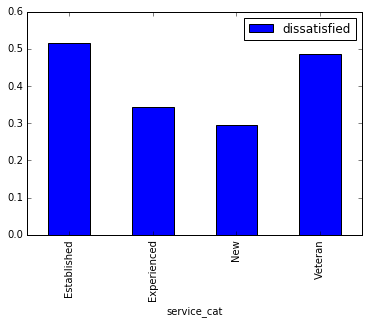

In [372]:
%matplotlib inline
service_cat_pivot.plot(kind = 'bar')

From initial observations, it seems that established employees and veteran employees left the company mostly due to dissatisfied reasons. New employees are the less likely to leave due to dissatisfication, maybe for other reasons.

## Handling the remaining missing data

In [373]:
combined_updated.isnull().sum()

cease_date              16
dissatisfied             0
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

In [374]:
combined_updated["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [375]:
combined_updated.columns

Index(['cease_date', 'dissatisfied', 'employment_status', 'gender', 'id',
       'institute', 'institute_service', 'position', 'separationtype',
       'institute_service_up', 'service_cat'],
      dtype='object')

In [388]:
#let's see if service_cat NULL values other data
service_nulls = combined_updated[combined_updated["service_cat"].isnull()]

In [389]:
service_nulls["employment_status"].value_counts(dropna = False)

NaN                    54
Permanent Part-time    20
Permanent Full-time    11
Temporary Part-time     2
Casual                  1
Name: employment_status, dtype: int64

By looking at above data, it seems most of the empty values come from part-time and non-value employees. I have decided to drop all these.

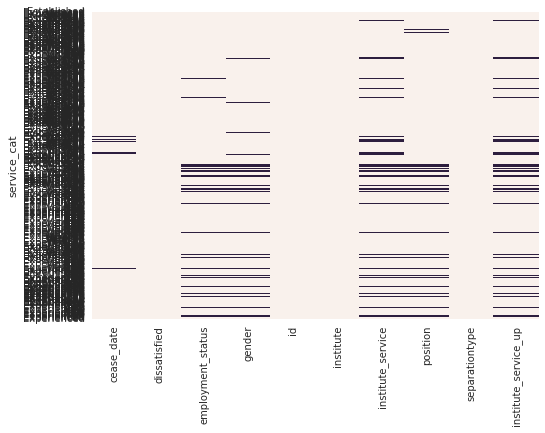

In [384]:
import seaborn as sns 

heatmap_data = combined_updated.set_index('service_cat') 

sns.heatmap(heatmap_data.isnull(), cbar=False)

In [390]:
new_combine = combined_updated.dropna(axis=0, subset=["service_cat"])

In [392]:
new_combine["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [396]:
#new-pivot
new_service_cat_pivot = new_combine.pivot_table(values = "dissatisfied", index = "service_cat", aggfunc=np.sum)

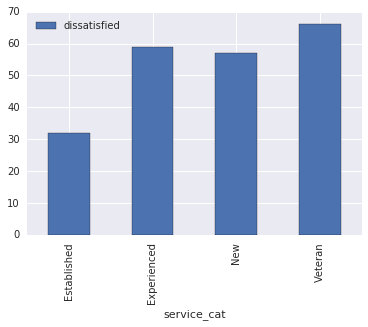

In [397]:
%matplotlib inline
new_service_cat_pivot.plot(kind = 'bar')

In [398]:
new_service_cat_pivot

,dissatisfied
service_cat,
Established,32.0
Experienced,59.0
New,57.0
Veteran,66.0


In above table, we can see how many people in each career stage resigned due to dissatisfaction.

## Cleaning Age Column

In [402]:
combined.columns

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'CurrentAge. Current Age', 'Institute',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)',
       'WorkArea', 'aboriginal', 'age', 'business_unit',
       'career_move_to_private_sector', 'career_move_to_public_sector',
       'cease_date', 'classification', 'dete_start_date', 'disability',
       'dissatisfaction_with_the_department', 'dissatisfied',
       'employment_conditions', 'employment

In [410]:
combined.notnull().sum().sort_index(ascending = False)

workload                                                                     311
work_location                                                                311
work_life_balance                                                            311
traumatic_incident                                                           311
torres_strait                                                                  0
study/travel                                                                 311
south_sea                                                                      3
separationtype                                                               651
role_start_date                                                              271
relocation                                                                   311
region                                                                       265
position                                                                     598
physical_work_environment   

In [411]:
combined["CurrentAge. Current Age"].value_counts(dropna = False)

NaN              361
41  45            45
46  50            39
51-55             39
21  25            33
31  35            32
26  30            32
36  40            32
56 or older       29
20 or younger      9
Name: CurrentAge. Current Age, dtype: int64

In [409]:
combined_updated_2.columns

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'Institute', 'WorkArea', 'age',
       'career_move_to_private_sector', 'career_move_to_public_sector',
       'cease_date', 'dissatisfaction_with_the_department', 'dissatisfied',
       'employment_conditions', 'employment_status', 'gender', 'id',
       'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'lack_of_job_security', 'lack_of_recognition', 'maternity/fami

In [406]:
combined_updated_2["age"].value_counts(dropna = False)

NaN              345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [407]:
#let's find which are other values for age nan values
age_nulls = combined_updated_2[combined_updated_2["age"].isnull()]

In [408]:
age_nulls

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,none_of_the_above,physical_work_environment,position,relocation,separationtype,study/travel,traumatic_incident,work_life_balance,work_location,workload
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,School Administrative Staff,False,Resignation,False,False,False,False,False
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Cleaner,True,Resignation,False,False,False,False,False
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher,False,Resignation,False,False,False,False,False
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher Aide,True,Resignation,False,False,False,False,False
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,Teacher Aide,False,Resignation,False,False,False,False,False
311,-,-,-,-,-,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN
312,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,...,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
313,-,-,-,-,-,-,-,-,-,Other,...,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
314,Career Move - Private Sector,-,-,-,-,-,-,Maternity/Family,-,Other,...,NaN,NaN,Administration (AO),NaN,Resignation,NaN,NaN,NaN,NaN,NaN
315,-,-,-,-,-,-,-,-,-,Other,...,NaN,NaN,Teacher (including LVT),NaN,Resignation,NaN,NaN,NaN,NaN,NaN


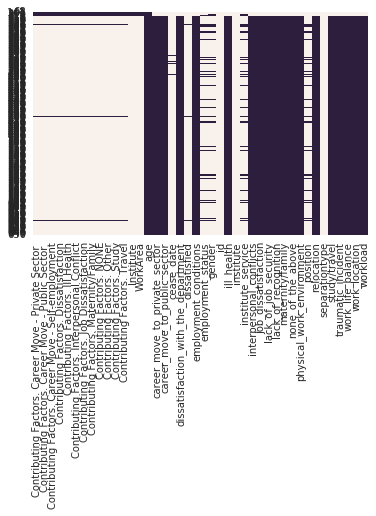

In [412]:
age_heatmap = age_nulls.set_index('age') 

sns.heatmap(age_nulls.isnull(), cbar=False)

By looking at heatmap, it is clear that missing values in age do not contribute much to overall data as these rows have missing values in most of the columns too. Thus, I will drop these.

In [420]:
new_combine_2 = combined.dropna(axis=0, subset=["age"])

In [421]:
new_combine_2["age"].value_counts(dropna = False)

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger     1
Name: age, dtype: int64

In [422]:
#in new column 20 or younger has only value so I will drop it.
new_combine_2 = new_combine_2[new_combine_2["age"] != '20 or younger']

In [424]:
new_combine_2["age"].value_counts(dropna = False)

41-45          48
46-50          42
36-40          41
26-30          35
51-55          32
21-25          29
31-35          29
56-60          26
61 or older    23
Name: age, dtype: int64

In [425]:
#do a pivot
new_combine_2_pivot = new_combine_2.pivot_table(values = "dissatisfied", index = "age", aggfunc= np.sum)

In [426]:
new_combine_2_pivot

,dissatisfied
age,
21-25,9
26-30,20
31-35,16
36-40,16
41-45,23
46-50,19
51-55,19
56-60,15
61 or older,12


In above, you can see how many people in each age group resigned due to some kind of dissatisfaction.

## Analyzing by Survey Type

In [427]:
combined.columns

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'CurrentAge. Current Age', 'Institute',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)',
       'WorkArea', 'aboriginal', 'age', 'business_unit',
       'career_move_to_private_sector', 'career_move_to_public_sector',
       'cease_date', 'classification', 'dete_start_date', 'disability',
       'dissatisfaction_with_the_department', 'dissatisfied',
       'employment_conditions', 'employment

In [429]:
combined["institute"].value_counts(dropna = False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [431]:
#do a pivot
new_combine_3_pivot = combined.pivot_table(values = "dissatisfied", index = "institute", aggfunc= np.sum)

In [432]:
new_combine_3_pivot

,dissatisfied
institute,
DETE,149
TAFE,91


In above we can see there are more employees in DETE survey who resigned due to some dissatisifaction.